In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [1]:
# https://vincentarelbundock.github.io/Rdatasets/datasets.html

# 1.

Исследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для
алгоритма adaboost.M1 на наборе данных Vehicle из пакета mlbench (обучающая выборка
должна состоять из 7/10 всех прецедентов, содержащихся в данном наборе данных). Постройте
график зависимости тестовой ошибки при числе деревьев, равном 1, 11, 21, . . . , 301, объясните
полученные результаты.

In [53]:
data = pd.read_csv('Vehicle.csv')
data.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [54]:
for column in data:
    print(column, ": ", data[column].isnull().sum())

Comp :  0
Circ :  0
D.Circ :  0
Rad.Ra :  0
Pr.Axis.Ra :  0
Max.L.Ra :  0
Scat.Ra :  0
Elong :  0
Pr.Axis.Rect :  0
Max.L.Rect :  0
Sc.Var.Maxis :  0
Sc.Var.maxis :  0
Ra.Gyr :  0
Skew.Maxis :  0
Skew.maxis :  0
Kurt.maxis :  0
Kurt.Maxis :  0
Holl.Ra :  0
Class :  0


In [55]:
from sklearn.model_selection import train_test_split
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100, shuffle=True)

In [56]:
accuracies = []
estimators_num = [i for i in range(1, 311, 10)]
for estimator_num in estimators_num:
    clf = AdaBoostClassifier(n_estimators=estimator_num, random_state=0)
    clf.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

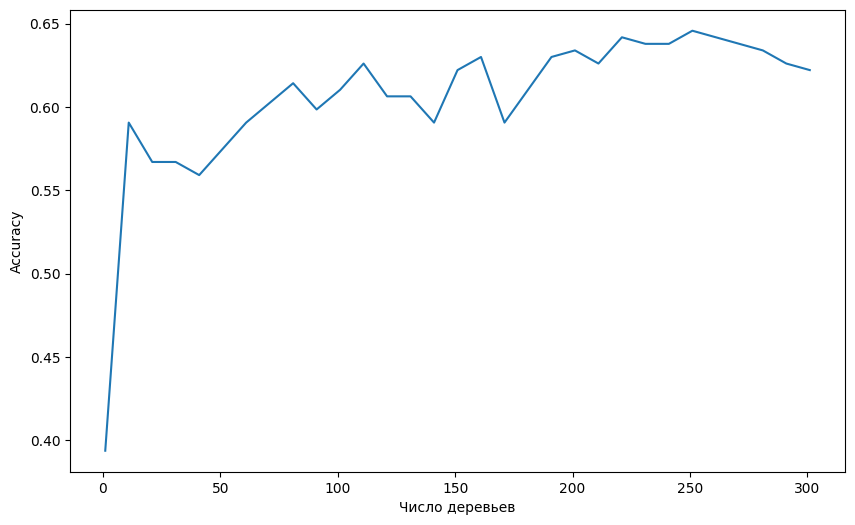

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(estimators_num, accuracies)
plt.xlabel('Число деревьев')
plt.ylabel('Accuracy')
plt.show()

# 2. 

Исследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для
алгоритма bagging на наборе данных Glass из пакета mlbench (обучающая выборка должна
состоять из 7/10 всех прецедентов, содержащихся в данном наборе данных). Постройте график
зависимости тестовой ошибки при числе деревьев, равном 1, 11, 21, . . . , 201, объясните
полученные результаты

In [58]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [59]:
for column in data:
    print(column, ": ", data[column].isnull().sum())

RI :  0
Na :  0
Mg :  0
Al :  0
Si :  0
K :  0
Ca :  0
Ba :  0
Fe :  0
Type :  0


In [60]:
from sklearn.model_selection import train_test_split
X = data.drop("Type", axis=1)
y = data["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100, shuffle=True)

In [61]:
accuracies = []
estimators_num = [i for i in range(1, 211, 10)]
for estimator_num in estimators_num:
    clf = BaggingClassifier(n_estimators=estimator_num, random_state=100)
    clf.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

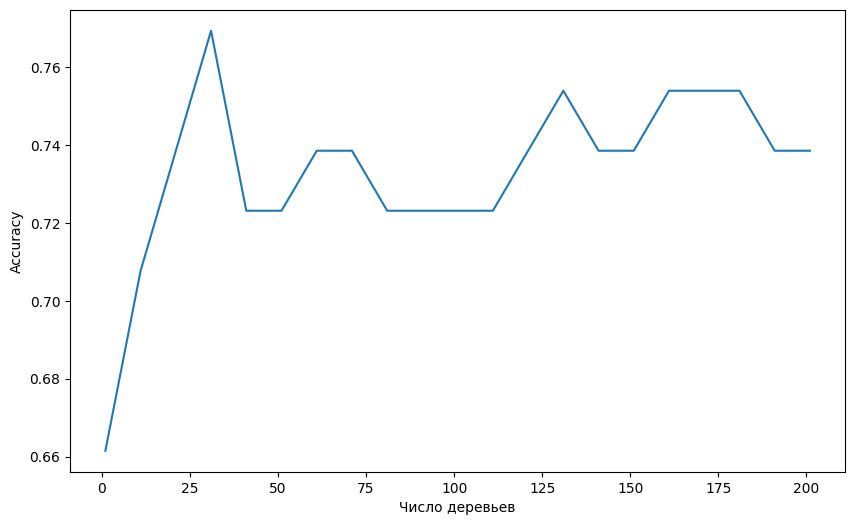

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(estimators_num, accuracies)
plt.xlabel('Число деревьев')
plt.ylabel('Accuracy')
plt.show()

# 3.

Реализуйте бустинг алгоритм с классификатором K ближайших соседей. Сравните
тестовую ошибку, полученную с использованием данного классификатора на наборах данных
Vehicle и Glass, c тестовой ошибкой, полученной с использованием единичного дерева
классификации. 

In [63]:
data_v = pd.read_csv('Vehicle.csv')
data_v.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [64]:
data_g = pd.read_csv('glass.csv')
data_g.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [65]:
X = data_v.drop("Class", axis=1)
y = data_v["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100, shuffle=True)

In [66]:
clf = BaggingClassifier(estimator=KNeighborsClassifier(), random_state=100)
clf.fit(X_train, y_train)
print("vehicle knn acc: ", accuracy_score(y_test, clf.predict(X_test)))

vehicle knn acc:  0.6496062992125984


In [67]:
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)
print("vehicle tree acc: ", accuracy_score(y_test, clf.predict(X_test)))

vehicle tree acc:  0.7440944881889764


In [68]:
X = data_g.drop("Type", axis=1)
y = data_g["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100, shuffle=True)

In [69]:
clf = BaggingClassifier(estimator=KNeighborsClassifier(), random_state=100)
clf.fit(X_train, y_train)
print("glass knn acc: ", accuracy_score(y_test, clf.predict(X_test)))

glass knn acc:  0.7230769230769231


In [70]:
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)
print("glass tree acc: ", accuracy_score(y_test, clf.predict(X_test)))

glass tree acc:  0.7538461538461538
